In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Load the data
df = pd.read_csv('Chinook_Employee_Joins_Aggregated_Nums.csv')

# Inspect data
print(df.head(), "\n")
print(df.columns, "\n")



   EmployeeId Employee_FirstName Employee_LastName Sex Employee_HireDate  \
0           3               Jane           Peacock   F        2002-04-01   
1           4           Margaret              Park   F        2003-05-03   
2           5              Steve           Johnson   M        2003-10-17   
3          19              Doris           Hartwig   M        2007-10-09   
4          16             Taylor           Maxwell   M        2007-09-08   

  Employee_BirthDate  Employee_Age  ReportsTo        Employee_Role  \
0         1973-08-29            51        2.0  Sales Support Agent   
1         1947-09-19            77        2.0  Sales Support Agent   
2         1965-03-03            59        2.0  Sales Support Agent   
3         1955-11-03            69        2.0  Sales Support Agent   
4         1955-10-31            69        2.0  Sales Support Agent   

   TotalInvoices  TotalRevenue  AvgRevenue  
0            146        833.04    5.705753  
1            140        775.40  

In [75]:
# Convert 'Employee_HireDate' to a datetime object
df['Employee_HireDate'] = pd.to_datetime(df['Employee_HireDate'])

# Calculate tenure in years
current_date = pd.Timestamp.now()
df['Tenure'] = (current_date - df['Employee_HireDate']).dt.days / 365


# Format AvgRevenue to 2 decimal places
df['AvgRevenue'] = df['AvgRevenue'].round(2)


# Fill any remaining NaN values with 0
df[['TotalRevenue', 'AvgRevenue', 'ReportsTo']] = df[['TotalRevenue', 'AvgRevenue', 'ReportsTo']].fillna(0)


# Round tenure to the nearest integer
df[['Tenure', 'ReportsTo']] = df[['Tenure', 'ReportsTo']].round().astype(int)

# Ensure all rows are displayed
# pd.set_option('display.max_rows', None)
# Sort 'TotalInvoices' in ascending order
# sorted_total_invoices = df['TotalInvoices'].sort_values(ascending=True)
# Print the sorted column
# print(sorted_total_invoices)

print(df.head(), "\n")


   EmployeeId Employee_FirstName Employee_LastName Sex Employee_HireDate  \
0           3               Jane           Peacock   F        2002-04-01   
1           4           Margaret              Park   F        2003-05-03   
2           5              Steve           Johnson   M        2003-10-17   
3          19              Doris           Hartwig   M        2007-10-09   
4          16             Taylor           Maxwell   M        2007-09-08   

  Employee_BirthDate  Employee_Age  ReportsTo        Employee_Role  \
0         1973-08-29            51          2  Sales Support Agent   
1         1947-09-19            77          2  Sales Support Agent   
2         1965-03-03            59          2  Sales Support Agent   
3         1955-11-03            69          2  Sales Support Agent   
4         1955-10-31            69          2  Sales Support Agent   

   TotalInvoices  TotalRevenue  AvgRevenue  Tenure  
0            146        833.04        5.71      23  
1            140

In [69]:
# Create a new DataFrame with only the required features
features = ['EmployeeId', 'Employee_Role', 'Sex', 'Employee_BirthDate', 'Employee_Age', 'Employee_HireDate', 'Tenure',
            'TotalInvoices', 'TotalRevenue', 'AvgRevenue']
df_filtered = df[features]


# Display the first few rows of the new DataFrame
print(df_filtered.head())

   EmployeeId        Employee_Role Sex Employee_BirthDate  Employee_Age  \
0           3  Sales Support Agent   F         1973-08-29            51   
1           4  Sales Support Agent   F         1947-09-19            77   
2           5  Sales Support Agent   M         1965-03-03            59   
3          19  Sales Support Agent   M         1955-11-03            69   
4          16  Sales Support Agent   M         1955-10-31            69   

  Employee_HireDate  Tenure  TotalInvoices  TotalRevenue  AvgRevenue  
0        2002-04-01      23            146        833.04        5.71  
1        2003-05-03      22            140        775.40        5.54  
2        2003-10-17      21            126        720.16        5.72  
3        2007-10-09      17             37        181.92        4.92  
4        2007-09-08      17             31        171.87        5.54  


In [76]:
# Remove samples where 'Employee_Role' is not 'Sales Support Agent'
df_final = df_filtered[df_filtered['Employee_Role'] == 'Sales Support Agent']

# Display the first few rows of the filtered DataFrame
print(df_final.head())

   EmployeeId        Employee_Role Sex Employee_BirthDate  Employee_Age  \
0           3  Sales Support Agent   F         1973-08-29            51   
1           4  Sales Support Agent   F         1947-09-19            77   
2           5  Sales Support Agent   M         1965-03-03            59   
3          19  Sales Support Agent   M         1955-11-03            69   
4          16  Sales Support Agent   M         1955-10-31            69   

  Employee_HireDate  Tenure  TotalInvoices  TotalRevenue  AvgRevenue  
0        2002-04-01      23            146        833.04        5.71  
1        2003-05-03      22            140        775.40        5.54  
2        2003-10-17      21            126        720.16        5.72  
3        2007-10-09      17             37        181.92        4.92  
4        2007-09-08      17             31        171.87        5.54  


In [48]:
# Define performance labels based on quantiles of 'TotalRevenue'
quantile_labels = ['Low Performer', 'Average Performer', 'High Performer']
df_final['Performance_Label'] = pd.qcut(df_final['TotalRevenue'], q=3, labels=quantile_labels)


# Encode the performance labels
label_encoder = LabelEncoder()
df_final['Performance_Label_Encoded'] = label_encoder.fit_transform(df_final['Performance_Label'])

# Display the first few rows of the filtered DataFrame with the new labels
print(df_final[['EmployeeId', 'TotalRevenue', 'Performance_Label']].head(), "\n")
df_final




   EmployeeId  TotalRevenue Performance_Label
0           3        833.04    High Performer
1           4        775.40    High Performer
2           5        720.16    High Performer
3          19        181.92    High Performer
4          16        171.87    High Performer 



,EmployeeId,Employee_Role,Sex,Employee_BirthDate,Employee_Age,Employee_HireDate,Tenure,TotalInvoices,TotalRevenue,AvgRevenue,Performance_Label,Performance_Label_Encoded
0,3,Sales Support Agent,F,1973-08-29,51,2002-04-01,22.832877,146.000000,833.04,5.705753,High Performer,1
1,4,Sales Support Agent,F,1947-09-19,77,2003-05-03,21.745205,140.000000,775.40,5.538571,High Performer,1
2,5,Sales Support Agent,M,1965-03-03,59,2003-10-17,21.287671,126.000000,720.16,5.715555,High Performer,1
3,19,Sales Support Agent,M,1955-11-03,69,2007-10-09,17.306849,37.000000,181.92,4.916756,High Performer,1
4,16,Sales Support Agent,M,1955-10-31,69,2007-09-08,17.391781,31.000000,171.87,5.544193,High Performer,1
...,...,...,...,...,...,...,...,...,...,...,...,...
291,291,Sales Support Agent,F,1967-10-16,57,2011-12-29,13.082192,13.950000,41.26,4.237272,Low Performer,2
292,242,Sales Support Agent,M,1951-12-11,73,2009-08-23,15.432877,13.954545,43.77,3.647647,Low Performer,2
293,254,Sales Support Agent,F,1971-04-05,53,2009-09-13,15.375342,13.950000,41.26,4.237272,Low Performer,2
294,231,Sales Support Agent,F,1986-04-19,38,2009-07-25,15.512329,13.950000,41.26,4.237272,Low Performer,2


In [49]:
# Define X (features) and y (target)
X = df_final[['Tenure', 'Employee_Age', 'TotalInvoices', 'AvgRevenue']]
y = df_final['Performance_Label_Encoded']

#normalize/standardize

# Split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize models
random_forest = RandomForestClassifier(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)

# Train models
random_forest.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)
y_pred_dt= decision_tree.predict(X_test)
print(y_pred_rf)
print(y_pred_dt)





[1 2 1 0 0 0 2 0 1 1 0 2 1 2 2 1 1 1 2 2 0 2 2 0 1 2 2 0 1 2 1 1 2 0 1 0 2
 0 0 1 0 1 2 0 0 1 1 1 2 1 2 1 1 0 2 0 0 0 1]
[1 2 1 0 0 0 2 0 1 1 0 2 1 2 2 1 1 1 2 2 0 2 2 0 1 2 2 0 1 2 1 1 2 0 1 0 2
 0 0 1 0 1 2 0 2 1 1 1 2 1 2 1 1 0 2 0 0 0 1]


In [51]:
df_final['Performance_Label_Encoded'].value_counts()

,count
Performance_Label_Encoded,
2,98
1,97
0,96


Random Forest Model Metrics:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98



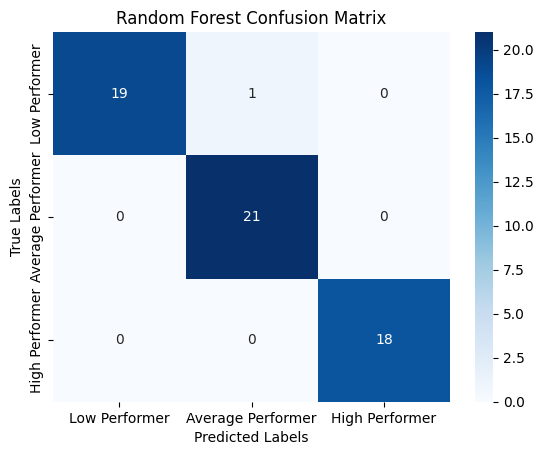

Decision Tree Model Metrics:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97



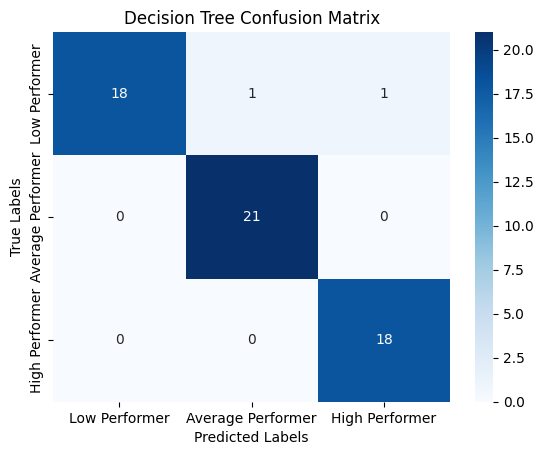

In [52]:
# Evaluate models
def evaluate_model(name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{name} Model Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print()

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=quantile_labels, yticklabels=quantile_labels)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Evaluate Random Forest
evaluate_model("Random Forest", y_test, y_pred_rf)

# Evaluate Decision Tree
evaluate_model("Decision Tree", y_test, y_pred_dt)


In [53]:
pd.get_dummies(df_final['Sex'],"\n")
pd.get_dummies(df_final)

,EmployeeId,Employee_Age,Employee_HireDate,Tenure,TotalInvoices,TotalRevenue,AvgRevenue,Performance_Label_Encoded,Employee_Role_Sales Support Agent,Sex_F,...,Employee_BirthDate_1990-03-04,Employee_BirthDate_1990-05-07,Employee_BirthDate_1990-06-01,Employee_BirthDate_1990-06-04,Employee_BirthDate_1990-08-04,Employee_BirthDate_1990-11-04,Employee_BirthDate_1990-12-29,Performance_Label_Low Performer,Performance_Label_Average Performer,Performance_Label_High Performer
0,3,51,2002-04-01,22.832877,146.000000,833.04,5.705753,1,True,True,...,False,False,False,False,False,False,False,False,False,True
1,4,77,2003-05-03,21.745205,140.000000,775.40,5.538571,1,True,True,...,False,False,False,False,False,False,False,False,False,True
2,5,59,2003-10-17,21.287671,126.000000,720.16,5.715555,1,True,False,...,False,False,False,False,False,False,False,False,False,True
3,19,69,2007-10-09,17.306849,37.000000,181.92,4.916756,1,True,False,...,False,False,False,False,False,False,False,False,False,True
4,16,69,2007-09-08,17.391781,31.000000,171.87,5.544193,1,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,291,57,2011-12-29,13.082192,13.950000,41.26,4.237272,2,True,True,...,False,False,False,False,False,False,False,True,False,False
292,242,73,2009-08-23,15.432877,13.954545,43.77,3.647647,2,True,False,...,False,False,False,False,False,False,False,True,False,False
293,254,53,2009-09-13,15.375342,13.950000,41.26,4.237272,2,True,True,...,False,False,False,False,False,False,False,True,False,False
294,231,38,2009-07-25,15.512329,13.950000,41.26,4.237272,2,True,True,...,False,False,False,False,False,False,False,True,False,False
